# Pymaceuticals Inc.
---

### Observations from the Pymaceuticals dataset

1.There is a positive correlation for the Capomulin regimen between tumor size and weight. As tumor size increases, so does the weight of the mouse.

2.The Capomulin and Ramicane regimens seem to be the most effect at reducing tumor volume. 

3.Infubinol has the greatest ending tumor volume as well as one outlier. Out of the four regimens reviewed in the boxplot, it seems to be the least effective at reducing tumor size.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouseMetaData = pd.read_csv(mouse_metadata_path)
studyResults = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
MD = pd.merge(studyResults, mouseMetaData, how="left", on=["Mouse ID", "Mouse ID"] )
# Display the data table for preview
MD.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
miceCount = MD["Mouse ID"].nunique()
miceCount

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = MD.loc[MD.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicateMouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseDF = MD.loc[MD["Mouse ID"] == "g989", :]
duplicateMouseDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newDF= MD[MD["Mouse ID"].isin(duplicateMouse)==False]
newDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
countnewDF=newDF["Mouse ID"].nunique()
countnewDF

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
meanRegimen = newDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

medianRegimen = newDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

varianceRegimen = newDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

stdRegimen = newDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

semRegimen = newDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summaryStatisticsDICT = {"Mean Tumor Volume": (meanRegimen),
                                  "Median Tumor Volume": (medianRegimen),
                                  "Tumor Volume Variance": (varianceRegimen),
                                  "Tumor Volume Std. Dev.": (stdRegimen),
                                  "Tumor Volume Std. Err.": (semRegimen)
                        }

summaryStatisticsDF = pd.DataFrame(summaryStatisticsDICT)

summaryStatisticsDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggData = newDF.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggData

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

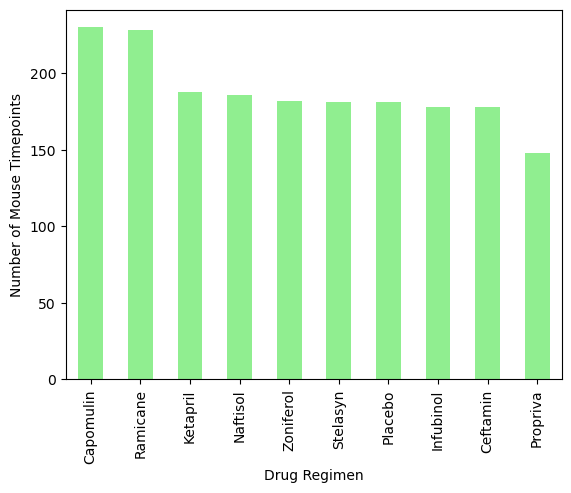

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timeCount = newDF["Drug Regimen"].value_counts()
barPlot = timeCount.plot.bar(color="lightgreen")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")

plt.show()

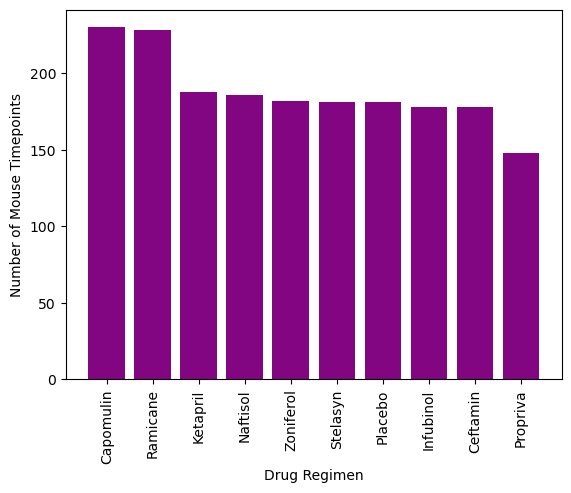

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xAxis = timeCount.index.values
yAxis = timeCount.values

plt.bar(xAxis, yAxis, color="purple", alpha=0.98, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

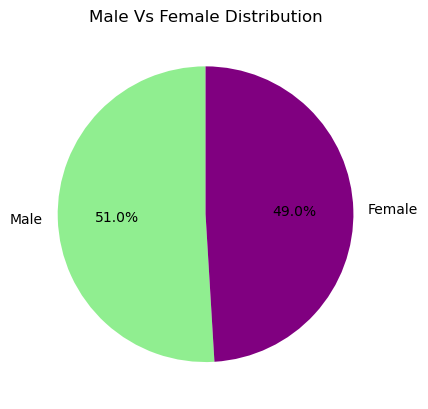

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceGender = newDF["Sex"].value_counts()
miceGender.plot.pie(ylabel="", title="Male Vs Female Distribution", colors=["lightgreen", "purple"], startangle= 90, autopct= "%1.1f%%")
plt.show()

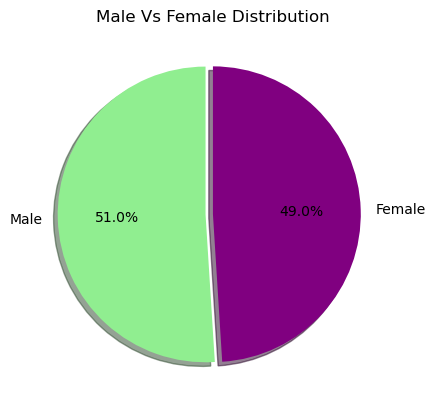

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male","Female"]
genderPct = [51,49]
colors = ["lightgreen","purple"]
explode = (0.05,0)
plt.pie(genderPct, explode=explode,labels=genders, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.ylabel("")
plt.title("Male Vs Female Distribution")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouseID = newDF.groupby("Mouse ID")
greatestTime = mouseID["Timepoint"].max()
greatestTime - greatestTime.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastTime = pd.merge(greatestTime, newDF, on=["Mouse ID", "Timepoint"])
lastTime.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    #Locate the rows which contain mice on each drug and get the tumor volumes
    lastTumor = lastTime.loc[lastTime["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    #add subset
    tumorVol.append(lastTumor)
    
    quartiles = lastTumor.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = lastTumor.mean()
    iqr = upperq-lowerq
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds

    outliers = lastTumor.loc[(lastTumor<lowerBound)|(lastTumor>upperBound)]
    
    
    print(f"----------")
    print(f"{treatment}")
    print(f"----------")
    print(f"Lower Quartile: {lowerq.round(2)}")
    print(f"Upper Quartile: {upperq.round(2)}")
    print(f"Interquartile Range:{iqr.round(2)}")
    print(f"Number of Outliers: {outliers.count()}")
    print(f"Potential Outliers:{outliers}")
    print(f"-----------------------------------------------------------------------")

----------
Capomulin
----------
Lower Quartile: 32.38
Upper Quartile: 40.16
Interquartile Range:7.78
Number of Outliers: 0
Potential Outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------------------------------------------
----------
Ramicane
----------
Lower Quartile: 31.56
Upper Quartile: 40.66
Interquartile Range:9.1
Number of Outliers: 0
Potential Outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------------------------------------------
----------
Infubinol
----------
Lower Quartile: 54.05
Upper Quartile: 65.53
Interquartile Range:11.48
Number of Outliers: 1
Potential Outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------------------------------------------------
----------
Ceftamin
----------
Lower Quartile: 48.72
Upper Quartile: 64.3
Interquartile Range:15.58
Number of Outliers: 0
Potential Outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
--

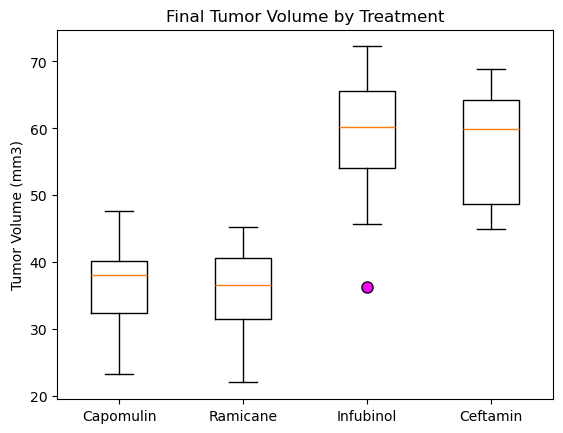

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumorVol, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=dict(marker="o", markerfacecolor="magenta", markersize=8))
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

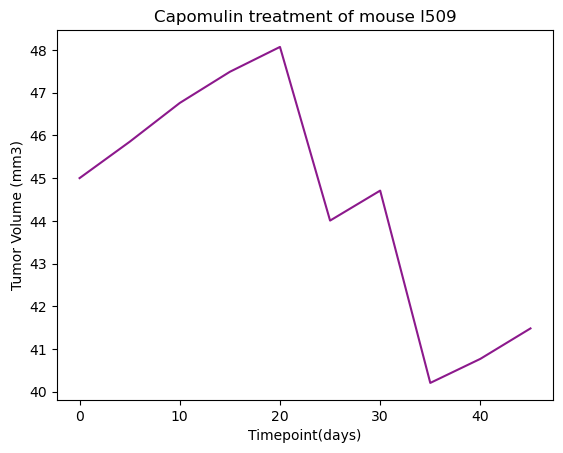

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseID = "l509" 
capomulinData = newDF[(newDF["Drug Regimen"] == "Capomulin") & (newDF["Mouse ID"] == mouseID)]

# Extract time points and tumor volumes
timePoints = capomulinData["Timepoint"]
tumorVolumes = capomulinData["Tumor Volume (mm3)"]

# Generate the line plot
plt.plot(timePoints, tumorVolumes, color="purple", alpha=0.90)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouseID}")
plt.show()

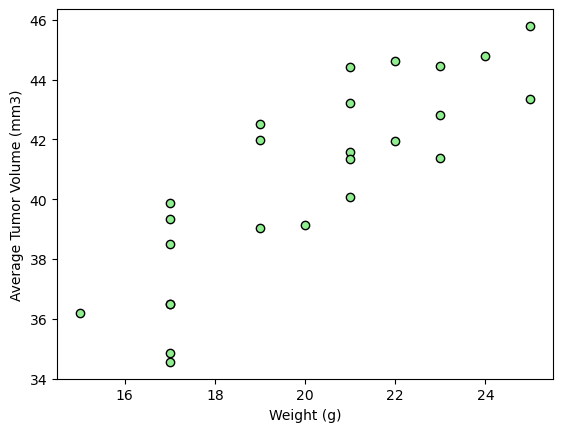

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capData = newDF[newDF["Drug Regimen"] == "Capomulin"]

tumorVolume = capData.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouseWeight = capData.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouseWeight,tumorVolume, facecolors="lightgreen", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


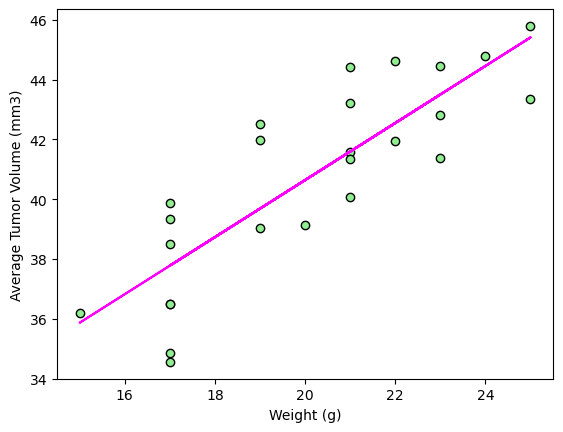

In [25]:
# Calculate the correlation coefficient and a linear regression model 

capData = newDF[newDF["Drug Regimen"] == "Capomulin"]

tumorVolume = capData.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouseWeight = capData.groupby("Mouse ID")["Weight (g)"].mean()

correlation = st.pearsonr(mouseWeight, tumorVolume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation [0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress( mouseWeight, tumorVolume)
regressVal = (mouseWeight) * slope + intercept
lineEQ = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mouseWeight,tumorVolume, facecolors="lightgreen", edgecolors="black")
plt.plot(mouseWeight, regressVal, color="magenta")
plt.annotate(lineEQ, (5.8,0.8), fontsize=15, color="purple")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()